<a href="https://colab.research.google.com/github/LinarKulinar/VortexBeamResearch/blob/main/(tmp)forming_vortex_beam_master_research_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вихревые оптические пучки
## НИР Ахметов Линар 6133 2 семестр магистратуры
### Тема НИР: Распознавание мультиплексированных вихревых пучков с использованием нейронных сетей



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

Определим функцию *f*, которая задает значение поля в точке *(r, phi)* с учётом параметров *m∈ℤ* и σ∈ℜ.:

$ f(r, ϕ) = exp(-\cfrac{r^2}{σ^2}) \cdot r^{|m|} \cdot exp(i \cdot m \cdot ϕ) $

In [2]:
def f (r, phi, m, sigma):
  """
  Функция, описывающая входной пучок exp(i*m*phi)
  :param r: удаление точки от центра изображения
  :param phi: угол точки в исходном пучке
  :param m: параметр пучка - угловой орбительный момент
  :param sigma: параметр пучка - радиус перетяжки
  :return значение функции в точке (r, phi)
  """
  return math.exp(-(r/sigma)**2) * r**abs(m) * (math.cos(m * phi) + math.sin(m * phi)*1j)

In [15]:
def f_with_tilt (r, phi, m, sigma, alpha):
  """
  Функция, описывающая входной пучок exp(i*m*phi)
  :param r: удаление точки от центра изображения
  :param phi: угол точки в исходном пучке
  :param m: параметр пучка - угловой орбительный момент
  :param sigma: параметр пучка - радиус перетяжки
  :param alpha: параметр линзы, сквозь который проходит пучок - угол отклонения оси линзы от линии распространения пучка
  :return значение функции в точке (r, phi)
  """
  x = r*math.cos(phi)
  y = r*math.sin(phi)  
  return math.exp(-(r/sigma)**2) * r**abs(m) * (math.cos(m * phi) + math.sin(m * phi)*1j) * (math.cos(alpha * x * y) + math.sin(alpha * x * y)*1j)

И функцию, создающую и вычисляющую значение функции *f(r, ϕ)* в каждой точке квадратного поля размером *(-size, size)*  с числом отсчётов, переданных в кортеже *matrix_shape*

In [4]:
def get_field(size, matrix_shape, m, sigma):
  x_linspace = np.linspace(-size, size, matrix_shape[0])
  y_linspace = np.linspace(-size, size, matrix_shape[1])

  field = np.zeros(matrix_shape, dtype=complex)

  for i in range(matrix_shape[0]):
    for j in range(matrix_shape[1]):
      middle = min(matrix_shape) // 2
      di = i - middle
      dj = j - middle
      if abs(di) ** 2 + abs(dj) ** 2 <= middle ** 2:  # Если мы находимся внутри круга с радиусом, равным count/2
        phi = math.atan2(di, dj) # в полярных координатах
        r_coord = math.sqrt(x_linspace[i]**2 + y_linspace[j]**2)
        field[i,j] = f (r_coord, phi, m, sigma)
  return (field, x_linspace, y_linspace)


$ tilt(r, ϕ) = exp(i \cdot α \cdot x \cdot y) $,

где $α$-малый угол наклона линзы

In [16]:
def get_field_with_tilt(size, matrix_shape, m, sigma, alpha):
  x_linspace = np.linspace(-size, size, matrix_shape[0])
  y_linspace = np.linspace(-size, size, matrix_shape[1])

  field = np.zeros(matrix_shape, dtype=complex)

  for i in range(matrix_shape[0]):
    for j in range(matrix_shape[1]):
      middle = min(matrix_shape) // 2
      di = i - middle
      dj = j - middle
      if abs(di) ** 2 + abs(dj) ** 2 <= middle ** 2:  # Если мы находимся внутри круга с радиусом, равным count/2
        phi = math.atan2(di, dj) # в полярных координатах
        r_coord = math.sqrt(x_linspace[i]**2 + y_linspace[j]**2)
        field[i,j] = f_with_tilt (r_coord, phi, m, sigma, alpha)
  return (field, x_linspace, y_linspace)

Определим функцию, формирующую изображения пучков из комплексного numpy-массива field

In [6]:
def plot_field(field, x_linspace, y_linspace):
  import matplotlib.cm as cmap
  extent = [np.min(x_linspace), np.max(x_linspace), np.max(y_linspace), np.min(y_linspace)] # для корректных чисел на осях графика

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.absolute(field), cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Амплитуда комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.absolute(field)**2, cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Интенсивность комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.angle(field), cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Фаза комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

Вызовем вышеописанные функции для отображения пучка *m = 3* и числом отчётов, равным *101* по горизонтали и вертикали 

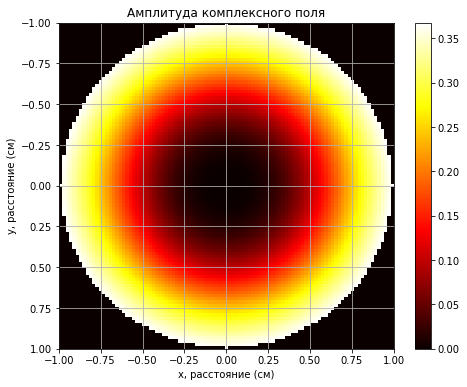

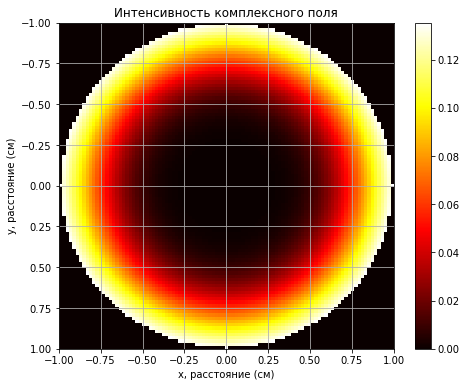

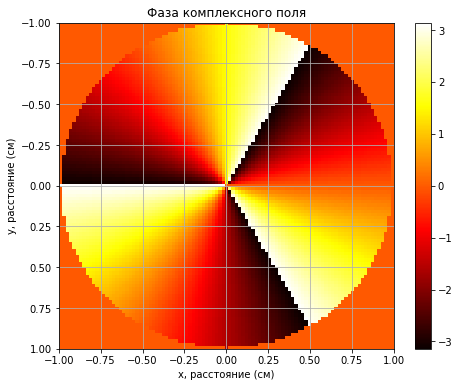

In [7]:
field, x_linspace, y_linspace = get_field(size=1, matrix_shape=(101, 101), m=3, sigma=1)
plot_field(field, x_linspace, y_linspace)

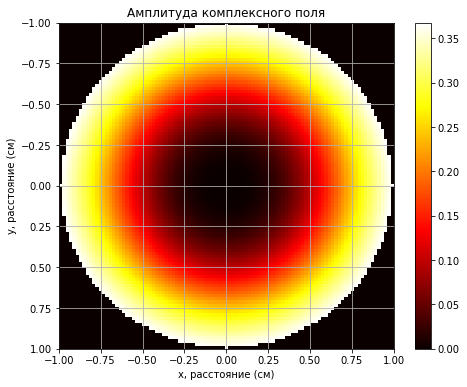

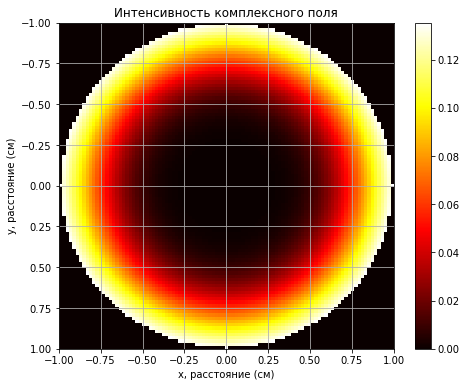

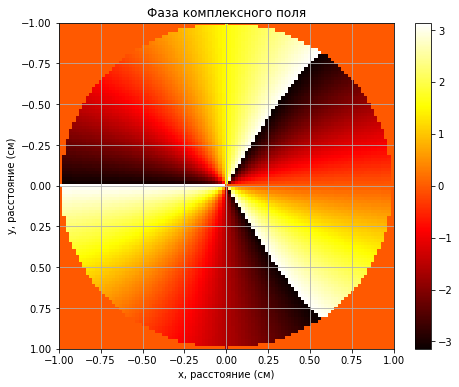

In [17]:
field, x_linspace, y_linspace = get_field_with_tilt(size=1, matrix_shape=(101, 101), m=3, sigma=1, alpha=0.5)
plot_field(field, x_linspace, y_linspace)